In [1]:
# 🔌 Cargar la extensión de Kedro en Jupyter
%load_ext kedro.ipython
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [3]:
import joblib

results = catalog.load("knn_results") 
print(results)

[10/24/25 19:43:16] INFO     Loading data from knn_results (PickleDataset)...                  ]8;id=798124;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=46202;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

{'model_name': 'KNeighborsClassifier', 'f1_mean_cv': np.float64(0.031274764333985385), 'f1_std_cv': np.float64(0.0017936043298687528), 'report': {'0': {'precision': 0.9903533956256199, 'recall': 0.9735374257872834, 'f1-score': 0.9818734166733515, 'support': 194879.0}, '1': {'precision': 0.022925350511557408, 'recall': 0.061452513966480445, 'f1-score': 0.03339312819097558, 'support': 1969.0}, 'accuracy': 0.964414167276274, 'macro avg': {'precision': 0.5066393730685886, 'recall': 0.5174949698768819, 'f1-score': 0.5076332724321635, 'support': 196848.0}, 'weighted avg': {'precision': 0.9806765595854793, 'recall': 0.964414167276274, 'f1-score': 0.9723861082525304, 'support': 196848.0}}, 'confusion_matrix': [[189722, 5157], [1848, 121]]}


In [1]:
df = catalog.load("PRI_FULL_BASE")   # lee el dataset del catálogo
list(df.columns)  

                    INFO     Loading data from PRI_FULL_BASE (ParquetDataset)...               ]8;id=800259;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=547405;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\


[
    'TransactionID',
    'CustomerID',
    'CustLocation',
    'TransactionDate',
    'TransactionTime',
    'TransactionAmount (INR)',
    'txn_count',
    'total_spent',
    'avg_spent',
    'max_spent',
    'avg_balance',
    'first_txn_date',
    'last_txn_date',
    'recency_days',
    'tenure_days',
    'txn_per_day',
    'Recency',
    'Frequency',
    'Monetary',
    'RFM Score',
    'Segment_Final',
    'is_fraud',
    'DayOfWeek',
    'IsWeekend',
    'hour',
    'IsLateNight',
    'TimeOfDay',
    'AmountZScoreByLocation',
    'TimeSinceLastTxn',
    'TxnCountInLast24Hours',
    'RiskScore',
    'IsAnomaly'
]

📊 Columnas numéricas incluidas en el mapa de calor:
['TransactionAmount (INR)', 'txn_count', 'total_spent', 'avg_spent', 'max_spent', 'avg_balance', 'recency_days', 'tenure_days', 'txn_per_day', 'Recency', 'Frequency', 'Monetary', 'RFM Score', 'is_fraud', 'IsWeekend', 'IsLateNight', 'AmountZScoreByLocation', 'TimeSinceLastTxn', 'TxnCountInLast24Hours', 'RiskScore', 'IsAnomaly']

Shape del dataset: (984240, 32)


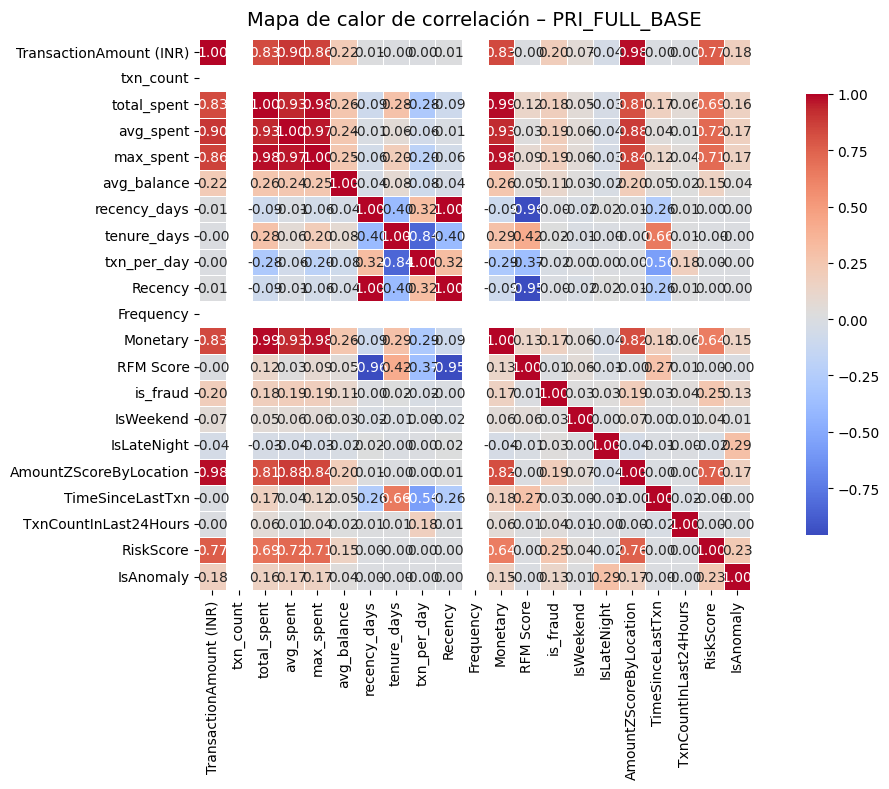

In [4]:
# Filtrar solo columnas numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Calcular matriz de correlación
corr = df[num_cols].corr()

# Mostrar las columnas numéricas
print("📊 Columnas numéricas incluidas en el mapa de calor:")
print(list(num_cols))
print("\nShape del dataset:", df.shape)

# --- Graficar ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Mapa de calor de correlación – PRI_FULL_BASE", fontsize=14, pad=10)
plt.tight_layout()
plt.show()

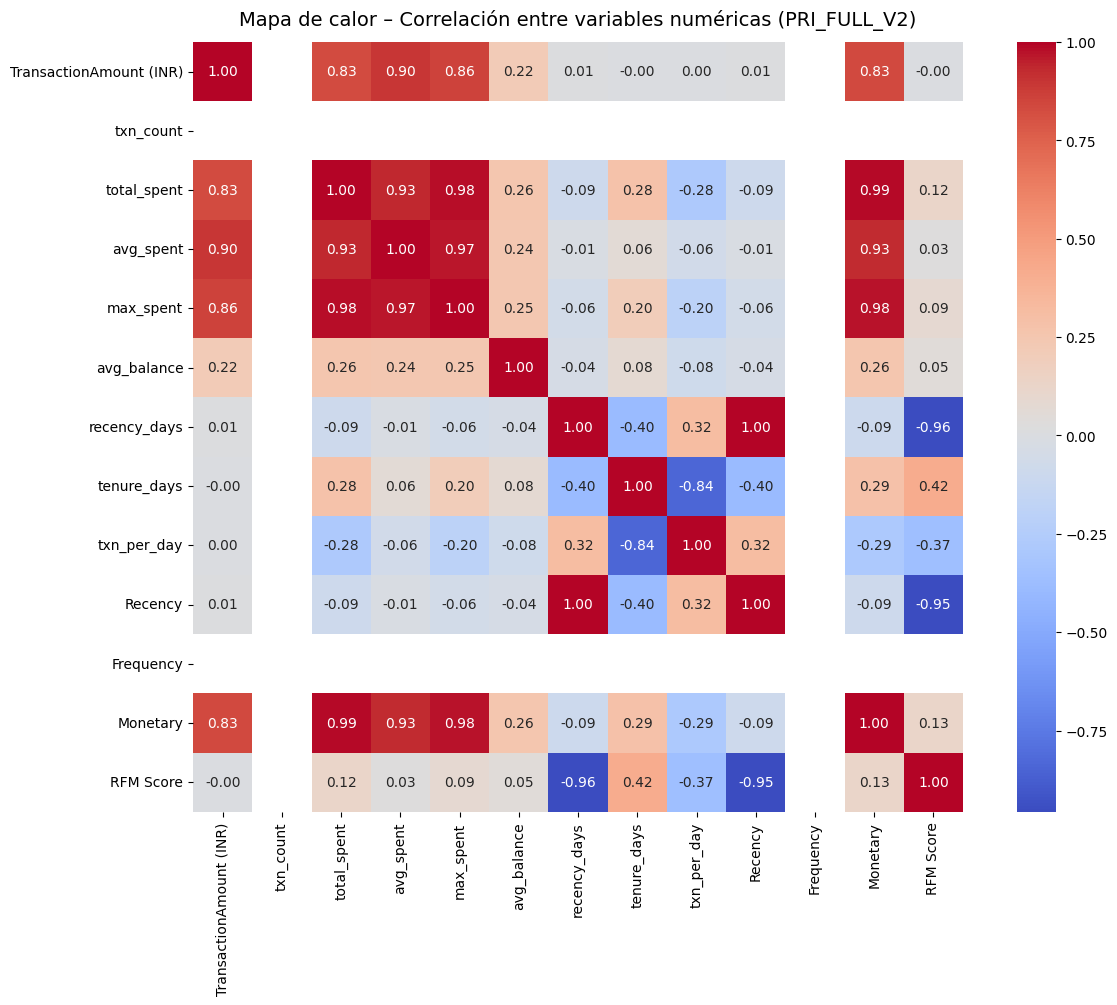

In [5]:
# ============================
# 🔥 Mapa de calor de correlación
# ============================

# Seleccionamos solo las variables numéricas
df_num = df.select_dtypes(include=["number"])

# Calculamos la matriz de correlación
corr_matrix = df_num.corr()

# Tamaño del gráfico
plt.figure(figsize=(14, 10))

# Mapa de calor con etiquetas y color degradado
sns.heatmap(
    corr_matrix,
    annot=True,        # muestra los valores
    fmt=".2f",         # formato decimal
    cmap="coolwarm",   # esquema de colores
    cbar=True,         # muestra barra lateral
    square=True
)

plt.title("Mapa de calor – Correlación entre variables numéricas (PRI_FULL_V2)", fontsize=14, pad=12)
plt.show()


In [9]:
# =============================================
# 🔍 COMPARAR TRANSACCIONES ENTRE DOS DATASETS
# =============================================
import pandas as pd

# --- 1. Cargar ambos datasets ---
# Ajusta las rutas si están en otra carpeta
fraud_df = catalog.load("fraud_dataset")
pri_full_df = catalog.load("PRI_full")

# --- 2. Mostrar estructura básica ---
print("Dataset FRAUD:")
print("Shape:", fraud_df.shape)
print("Columnas:", fraud_df.columns.tolist(), "\n")

print("Dataset PRI_FULL:")
print("Shape:", pri_full_df.shape)
print("Columnas:", pri_full_df.columns.tolist(), "\n")

# --- 3. Identificar columnas comunes ---
common_cols = list(set(fraud_df.columns).intersection(set(pri_full_df.columns)))
print("✅ Columnas comunes encontradas:", common_cols, "\n")

# --- 4. Si existe TransactionID, comparar coincidencias ---
if "TransactionID" in common_cols:
    merged = pri_full_df.merge(fraud_df, on="TransactionID", how="inner")
    print(f"🔗 Transacciones en común: {len(merged)}")
    print(f"🔸 Total en FRAUD: {len(fraud_df)}")
    print(f"🔸 Total en PRI_FULL: {len(pri_full_df)}")

    # --- 5. Revisar si las del dataset FRAUD están incluidas en PRI_FULL ---
    if len(merged) == len(fraud_df):
        print("\n✅ El dataset FRAUD está completamente contenido en PRI_FULL (solo fraudes).")
    elif len(merged) == 0:
        print("\n⚠️ No se encontraron coincidencias. Verifica la columna TransactionID o el formato.")
    else:
        print("\n🟡 El dataset FRAUD comparte algunas transacciones con PRI_FULL, pero no todas.")

    # --- 6. (Opcional) Revisar proporción de fraudes ---
    if "is_fraud" in fraud_df.columns:
        fraud_ratio = fraud_df["is_fraud"].mean() * 100
        print(f"\n📊 Porcentaje de transacciones marcadas como fraude: {fraud_ratio:.2f}%")
else:
    print("⚠️ No hay columna 'TransactionID' común entre los datasets. Usa otra columna clave para comparar.")


[10/21/25 23:04:53] INFO     Loading data from fraud_dataset (CSVDataset)...                   ]8;id=40063;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=71731;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from PRI_full (ParquetDataset)...                    ]8;id=164587;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=505969;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Dataset FRAUD:
Shape: (9843, 22)
Columnas: ['Unnamed: 0', 'TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)', 'Age', 'AmountZScoreByLocation', 'DayOfWeek', 'IsWeekend', 'IsHoliday', 'TimeOfDay', 'IsLateNight', 'TimeSinceLastTxn', 'TxnCountInLast24Hours', 'IsAnomaly', 'RiskScore', 'Segment'] 

Dataset PRI_FULL:
Shape: (984240, 21)
Columnas: ['TransactionID', 'CustomerID', 'CustLocation', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)', 'txn_count', 'total_spent', 'avg_spent', 'max_spent', 'avg_balance', 'first_txn_date', 'last_txn_date', 'recency_days', 'tenure_days', 'txn_per_day', 'Recency', 'Frequency', 'Monetary', 'RFM Score', 'Segment_Final'] 

✅ Columnas comunes encontradas: ['TransactionTime', 'CustLocation', 'TransactionDate', 'TransactionAmount (INR)', 'CustomerID', 'TransactionID'] 

🔗 Transacciones en común: 9843
🔸 Total en FRAUD: 9843
🔸 Total en PRI_

In [11]:
# Cargar el dataset (usa el catálogo de Kedro si ya lo tienes registrado)
df = catalog.load("fraud_dataset")

# Contar valores nulos por columna
null_counts = df.isnull().sum()

# Mostrar solo las columnas con nulos
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

print("🔍 Columnas con valores nulos:\n")
display(null_counts)

[10/21/25 23:07:25] INFO     Loading data from fraud_dataset (CSVDataset)...                   ]8;id=902936;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=436392;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

🔍 Columnas con valores nulos:



Series([], dtype: int64)

In [2]:
# Cargar el dataset desde el catálogo
df = catalog.load("PRI_full")

# Mostrar las primeras 5 filas
print("Primeras 5 filas del dataset:")
display(df.head(5))

[10/22/25 13:53:52] INFO     Loading data from PRI_full (ParquetDataset)...                    ]8;id=183399;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=473129;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Primeras 5 filas del dataset:


,TransactionID,CustomerID,CustLocation,TransactionDate,TransactionTime,TransactionAmount (INR),txn_count,total_spent,avg_spent,max_spent,...,first_txn_date,last_txn_date,recency_days,tenure_days,txn_per_day,Recency,Frequency,Monetary,RFM Score,Segment_Final
0,T1,C5841053,JAMSHEDPUR,2016-08-02,14:32:07,25.0,1,25.0,25.0,25.0,...,2016-08-02,2016-08-02,80,0,1.000000,80,1,25.0,131,At Risk/ Lost
1,T2,C2142763,JHAJJAR,2016-08-02,14:18:58,27999.0,1,27999.0,27999.0,27999.0,...,2016-08-02,2016-08-02,80,0,1.000000,80,1,27999.0,115,At Risk/ Lost
2,T3,C4417068,MUMBAI,2016-08-02,14:27:12,459.0,1,459.0,459.0,459.0,...,2016-08-02,2016-08-02,80,0,1.000000,80,1,459.0,123,At Risk/ Lost
3,T4,C5342380,MUMBAI,2016-08-02,14:27:14,2060.0,2,2938.4,1469.2,2060.0,...,2016-08-02,2016-08-13,69,11,0.181818,69,2,2938.4,255,Critical
4,T5,C9031234,NAVI MUMBAI,2016-08-02,18:11:56,1762.5,1,1762.5,1762.5,1762.5,...,2016-08-02,2016-08-02,80,0,1.000000,80,1,1762.5,154,Critical


[10/22/25 13:55:24] INFO     Loading data from PRI_full (ParquetDataset)...                    ]8;id=371467;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=698221;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[10/22/25 13:55:25] WARNING  C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\I warnings.py:110
                             Python\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK                     
                             SYMBOL}) missing from font(s) DejaVu Sans.                                            
                               fig.canvas.print_figure(bytes_io, **kw)                                             
                                                                                                                   

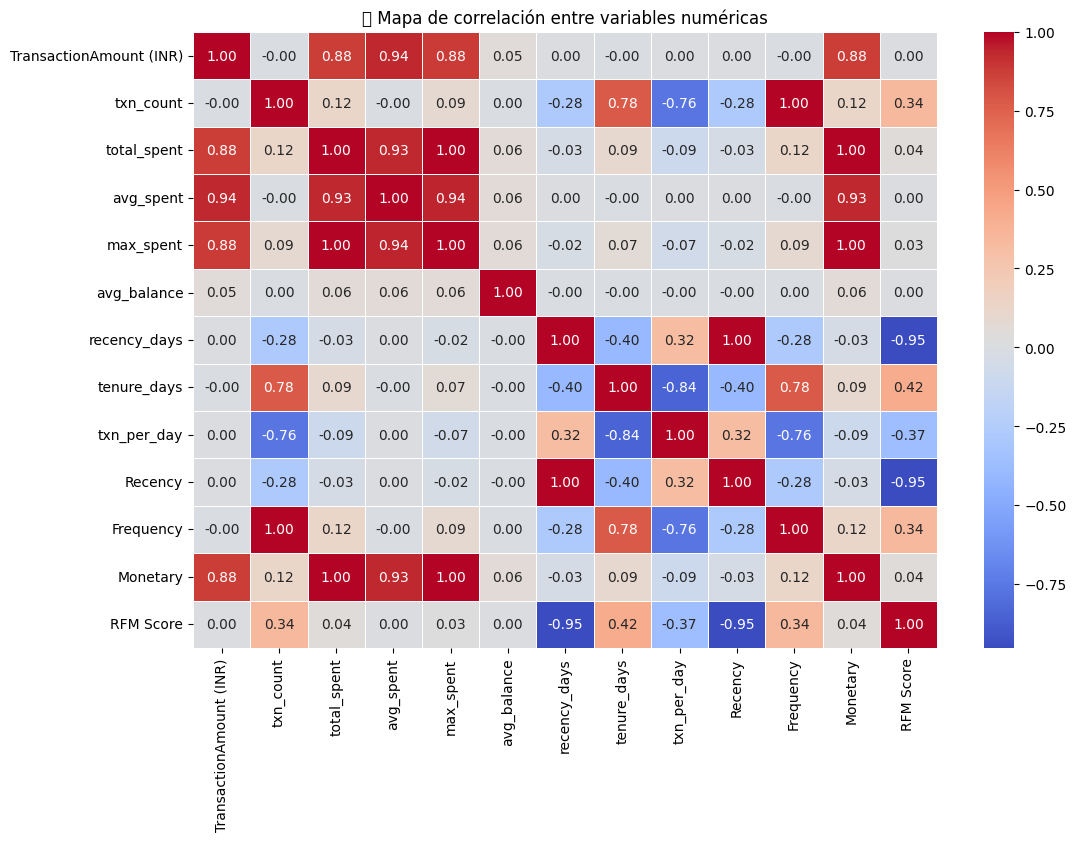

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
df = catalog.load("PRI_full")

# Seleccionar solo columnas numéricas
num_df = df.select_dtypes(include=['number'])

# Calcular matriz de correlación
corr_matrix = num_df.corr()

# Visualizar
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔗 Mapa de correlación entre variables numéricas")
plt.show()

In [4]:
df = catalog.load("fraud_dataset")   # lee el dataset del catálogo
list(df.columns)  

[10/22/25 14:25:32] INFO     Loading data from fraud_dataset (CSVDataset)...                   ]8;id=281941;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=164334;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\


[
    'Unnamed: 0',
    'TransactionID',
    'CustomerID',
    'CustomerDOB',
    'CustGender',
    'CustLocation',
    'CustAccountBalance',
    'TransactionDate',
    'TransactionTime',
    'TransactionAmount (INR)',
    'Age',
    'AmountZScoreByLocation',
    'DayOfWeek',
    'IsWeekend',
    'IsHoliday',
    'TimeOfDay',
    'IsLateNight',
    'TimeSinceLastTxn',
    'TxnCountInLast24Hours',
    'IsAnomaly',
    'RiskScore',
    'Segment'
]

In [5]:
#Crear etiqueta de fraude 1 Si esta en el fraud_Datset y 0 si no :p

df_full = catalog.load("PRI_full")
df_fraud = catalog.load("fraud_dataset")

# Etiqueta de fraude
df_full['is_fraud'] = df_full['TransactionID'].isin(df_fraud['TransactionID']).astype(int)

print(df_full['is_fraud'].value_counts())

[10/22/25 14:30:02] INFO     Loading data from PRI_full (ParquetDataset)...                    ]8;id=186323;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=61251;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from fraud_dataset (CSVDataset)...                   ]8;id=698090;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=51986;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

is_fraud
0    974397
1      9843
Name: count, dtype: int64


In [7]:
import pandas as pd
import numpy as np

# === 1️⃣ Cargar dataset base ===
df = catalog.load("PRI_full").copy()

# --- Asegurar formato de fechas y horas ---
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'], format='%H:%M:%S', errors='coerce')

# =========================================================
# === 2️⃣ Variables temporales y de contexto ===============
# =========================================================

# Día de la semana
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

# Fin de semana
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

# Hora del día
df['hour'] = df['TransactionTime'].dt.hour
df['IsLateNight'] = ((df['hour'] >= 23) | (df['hour'] <= 5)).astype(int)
df['TimeOfDay'] = pd.cut(
    df['hour'], bins=[0,6,12,18,24],
    labels=['Night','Morning','Afternoon','Evening'],
    right=False, include_lowest=True
)

# Festivos simulados (placeholder — puedes cargar tabla real)
df['IsHoliday'] = 0  

# =========================================================
# === 3️⃣ Variables de comportamiento ======================
# =========================================================

# Monto Z-Score por ubicación
df['AmountZScoreByLocation'] = (
    df.groupby('CustLocation')['TransactionAmount (INR)']
      .transform(lambda x: (x - x.mean()) / (x.std() + 1e-9))
)

# Días desde última transacción por cliente
df = df.sort_values(['CustomerID', 'TransactionDate'])
df['TimeSinceLastTxn'] = (
    df.groupby('CustomerID')['TransactionDate']
      .diff().dt.total_seconds() / (60*60*24)
).fillna(0)

# --- Simplificación robusta ---
# Si la diferencia entre esta y la anterior <= 24h, marcamos como 1
df['TxnCountInLast24Hours'] = (
    (df.groupby('CustomerID')['TransactionDate']
       .diff().dt.total_seconds() / 3600 <= 24)
    .astype(int)
    .fillna(0)
)

# =========================================================
# === 4️⃣ Variables de riesgo ==============================
# =========================================================

# Riesgo basado en monto relativo al promedio histórico del cliente
df['RiskScore'] = np.where(
    df['TransactionAmount (INR)'] > (
        df['TransactionAmount (INR)'].mean() +
        2 * df['TransactionAmount (INR)'].std()
    ),
    1, 0
)

# Anomalía simple (monto alto + transacción nocturna)
df['IsAnomaly'] = ((df['RiskScore'] == 1) & (df['IsLateNight'] == 1)).astype(int)

# =========================================================
# === 5️⃣ Limpieza y validación ============================
# =========================================================
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna({
    'AmountZScoreByLocation': 0,
    'TimeSinceLastTxn': 0,
    'TxnCountInLast24Hours': 0,
    'RiskScore': 0,
    'IsAnomaly': 0
})

print("✅ Nuevas columnas creadas:")
print([col for col in df.columns if col in [
    'DayOfWeek','IsWeekend','IsLateNight','TimeOfDay','IsHoliday',
    'AmountZScoreByLocation','TimeSinceLastTxn','TxnCountInLast24Hours','RiskScore','IsAnomaly'
]])
print("\nShape final:", df.shape)

[10/22/25 14:39:34] INFO     Loading data from PRI_full (ParquetDataset)...                    ]8;id=116584;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=757907;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[10/22/25 14:39:37] WARNING  C:\Users\AlexandreKz\AppData\Local\Temp\ipykernel_6060\879169417.py:39 warnings.py:110
                             : FutureWarning: The default of observed=False is deprecated and will                 
                             be changed to True in a future version of pandas. Pass observed=False                 
                             to retain current behavior or observed=True to adopt the future                       
                             default and silence this warning.                                                     
                               df.groupby('CustLocation')['TransactionAmount (INR)']                               
                                                                                                                   

✅ Nuevas columnas creadas:
['DayOfWeek', 'IsWeekend', 'IsLateNight', 'TimeOfDay', 'IsHoliday', 'AmountZScoreByLocation', 'TimeSinceLastTxn', 'TxnCountInLast24Hours', 'RiskScore', 'IsAnomaly']

Shape final: (984240, 32)


[10/22/25 14:40:31] WARNING  C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\I warnings.py:110
                             Python\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK                     
                             SYMBOL}) missing from font(s) DejaVu Sans.                                            
                               fig.canvas.print_figure(bytes_io, **kw)                                             
                                                                                                                   

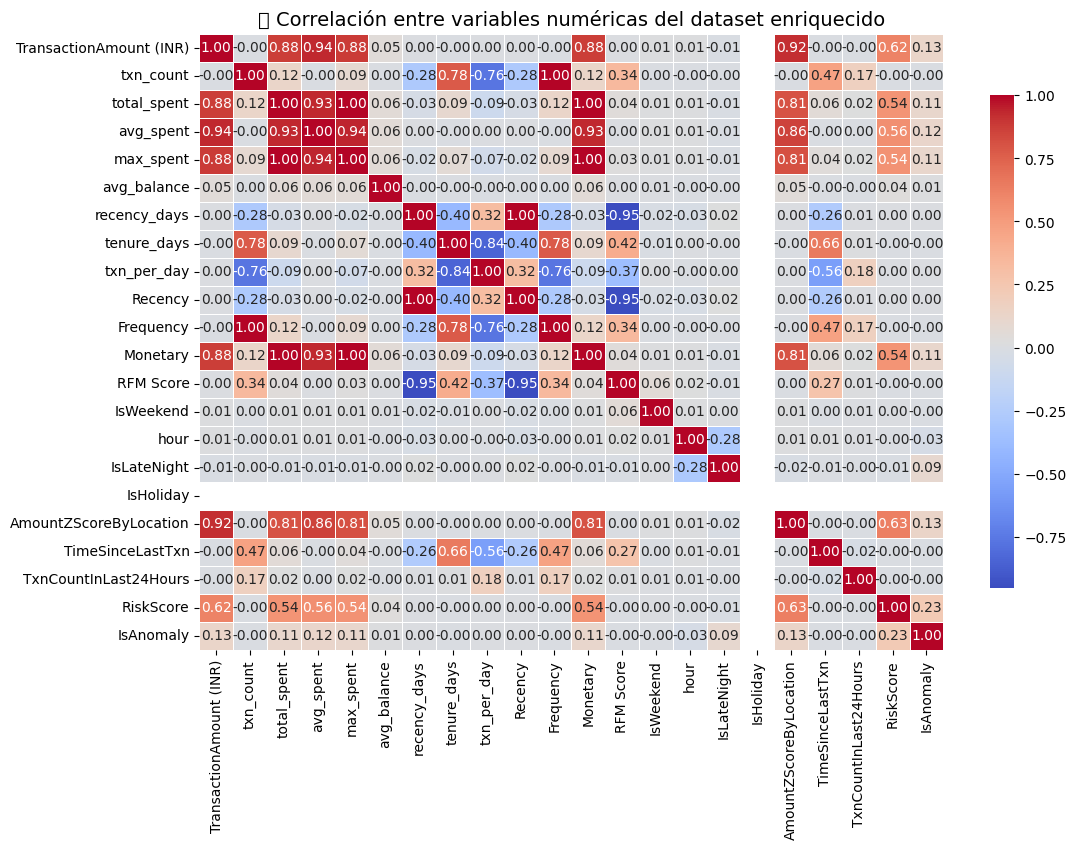

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Si aún no lo tienes en memoria:
# df = catalog.load("PRI_full_fraud_features")

# Seleccionar solo columnas numéricas
num_df = df.select_dtypes(include=['number'])

# Calcular matriz de correlación
corr_matrix = num_df.corr()

# Visualizar
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("🔗 Correlación entre variables numéricas del dataset enriquecido", fontsize=14)
plt.show()

[10/22/25 14:42:56] WARNING  C:\Users\AlexandreKz\AppData\Local\Temp\ipykernel_6060\1372662992.py:1 warnings.py:110
                             8: FutureWarning:                                                                     
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(                                                                        
                                                                                                                   

                    WARNING  C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\I warnings.py:110
                             Python\core\pylabtools.py:170: UserWarning: Glyph 128269                              
                             (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.                
                               fig.canvas.print_figure(bytes_io, **kw)                                             
                                                                                                                   

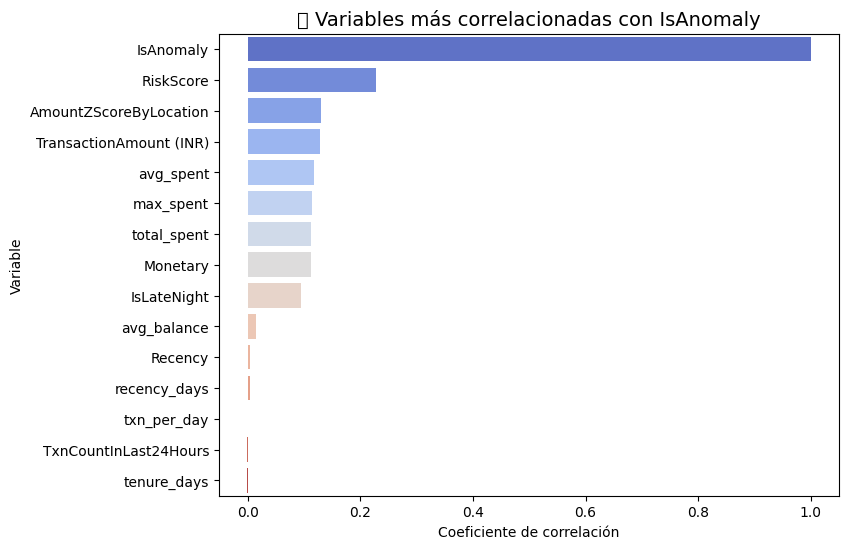

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Tomar solo las columnas numéricas
num_df = df.select_dtypes(include=['number'])

# Correlación solo con 'IsAnomaly'
corr_with_anomaly = (
    num_df.corr()['IsAnomaly']
    .sort_values(ascending=False)
    .to_frame()
    .rename(columns={'IsAnomaly': 'Correlation'})
)

# Visualización
plt.figure(figsize=(8,6))
sns.barplot(
    data=corr_with_anomaly.head(15).reset_index(),
    x='Correlation', y='index', palette='coolwarm'
)
plt.title("🔍 Variables más correlacionadas con IsAnomaly", fontsize=14)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variable")
plt.show()

In [14]:
import os
# Guardar el dataset en el directorio correcto
df.to_parquet("../data/03_primary/PRI_full_fraud_features.parquet", index=False)

print("✅ Dataset enriquecido guardado en data/03_primary/PRI_full_fraud_features.parquet")

✅ Dataset enriquecido guardado en data/03_primary/PRI_full_fraud_features.parquet


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

# ================================
# 1️⃣ Cargar dataset enriquecido
# ================================
df = catalog.load("PRI_full_fraud_features").copy()

# Si aún no tienes la etiqueta de fraude:
fraud = catalog.load("fraud_dataset")
df['is_fraud'] = df['TransactionID'].isin(fraud['TransactionID']).astype(int)

# ================================
# 2️⃣ Seleccionar variables relevantes
# ================================
features = [
    'TransactionAmount (INR)', 'RiskScore', 'AmountZScoreByLocation',
    'IsLateNight', 'IsWeekend', 'TimeSinceLastTxn',
    'TxnCountInLast24Hours'
]
target = 'is_fraud'

X = df[features]
y = df[target]

# ================================
# 3️⃣ Train/Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ================================
# 4️⃣ Modelo base: Random Forest
# ================================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# ================================
# 5️⃣ Evaluación
# ================================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("✅ Resultados del modelo base de fraude:\n")
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

# Importancia de features
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(data=feat_importance, x='Importance', y='Feature', palette='viridis')
plt.title("🌲 Importancia de variables en el modelo de fraude")
plt.show()

[10/22/25 15:46:30] INFO     Loading data from PRI_full_fraud_features (ParquetDataset)...     ]8;id=88772;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=707918;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[10/22/25 15:46:31] INFO     Loading data from fraud_dataset (CSVDataset)...                   ]8;id=127205;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=215514;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [3]:
pip install imbalanced-learn

In [4]:
#ESTE SMOTE crea fraudes :p
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Separar features y target
X = df[[
    'TransactionAmount (INR)', 'RiskScore', 'AmountZScoreByLocation',
    'IsLateNight', 'IsWeekend', 'TimeSinceLastTxn', 'TxnCountInLast24Hours'
]]
y = df['is_fraud']

# Split antes de balancear (muy importante)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Aplicar SMOTE SOLO en el conjunto de entrenamiento
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy=0.5)  # 0.5 = 1 fraude cada 2 normales aprox.
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Antes:", y_train.value_counts().to_dict())
print("Después del SMOTE:", y_train_bal.value_counts().to_dict())

# Entrenar el modelo balanceado
model = RandomForestClassifier(
    n_estimators=300, random_state=42, n_jobs=-1
)
model.fit(X_train_bal, y_train_bal)

# Evaluar
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

Antes: {0: 682078, 1: 6890}
Después del SMOTE: {0: 682078, 1: 341039}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    292319
           1       0.34      0.70      0.45      2953

    accuracy                           0.98    295272
   macro avg       0.67      0.84      0.72    295272
weighted avg       0.99      0.98      0.99    295272

AUC: 0.9539988755123362


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Entrenar con el conjunto balanceado
model_bal = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
model_bal.fit(X_train_bal, y_train_bal)

# Evaluar en el conjunto de prueba original (no balanceado)
y_pred_bal = model_bal.predict(X_test)
y_prob_bal = model_bal.predict_proba(X_test)[:, 1]

print("✅ Resultados del modelo balanceado con SMOTE:\n")
print(classification_report(y_test, y_pred_bal))
print("AUC:", roc_auc_score(y_test, y_prob_bal))

✅ Resultados del modelo balanceado con SMOTE:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    292319
           1       0.34      0.70      0.45      2953

    accuracy                           0.98    295272
   macro avg       0.67      0.84      0.72    295272
weighted avg       0.99      0.98      0.99    295272

AUC: 0.9539988598731814


[10/22/25 15:07:48] WARNING  C:\Users\AlexandreKz\AppData\Local\Temp\ipykernel_4132\3677372456.py:1 warnings.py:110
                             1: FutureWarning:                                                                     
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(data=feat_imp, x='Importance', y='Feature',                             
                             palette='viridis')                                                                    
                                                                                                                   

                    WARNING  C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\I warnings.py:110
                             Python\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN                
                             TREE}) missing from font(s) DejaVu Sans.                                              
                               fig.canvas.print_figure(bytes_io, **kw)                                             
                                                                                                                   

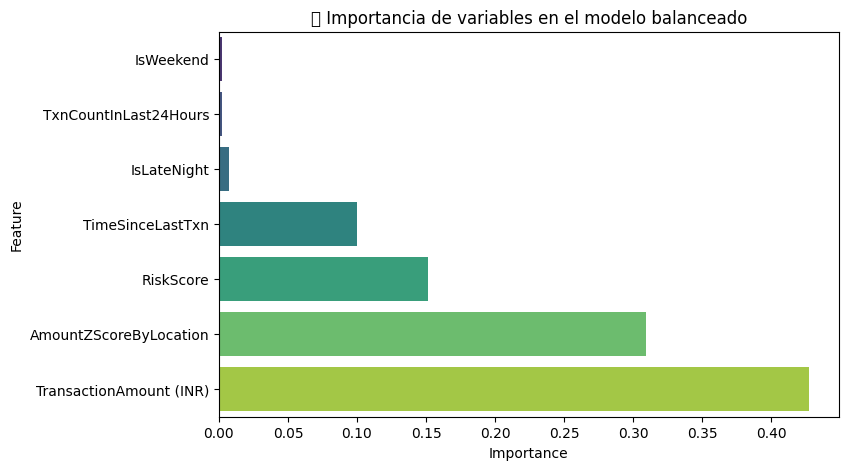

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_bal.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title("🌲 Importancia de variables en el modelo balanceado")
plt.show()

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# ================================
# 1️⃣ Definir el modelo base
# ================================
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# ================================
# 2️⃣ Definir el grid de parámetros
# ================================
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# ================================
# 3️⃣ Configurar búsqueda
# ================================
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',   # métrica base: área bajo curva ROC
    cv=3,                # validación cruzada 3-fold
    n_jobs=-1,
    verbose=2
)

# Entrenar con los datos balanceados
grid_search.fit(X_train_bal, y_train_bal)

# ================================
# 4️⃣ Resultados
# ================================
print("✅ Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_

# ================================
# 5️⃣ Evaluar modelo optimizado
# ================================
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

print("\n🏁 Resultados del modelo optimizado con GridSearch:")
print(classification_report(y_test, y_pred_best))
print("AUC:", roc_auc_score(y_test, y_prob_best))

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:36                                                                                   │
│                                                                                                  │
│   33 )                                                                                           │
│   34                                                                                             │
│   35 # Entrenar con los datos balanceados                                                        │
│ ❱ 36 grid_search.fit(X_train_bal, y_train_bal)                                                   │
│   37                                                                                             │
│   38 # ================================                                                          │
│   39 # 4️⃣ Resultados                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'X_train_bal' is not defined